In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import cv2 as cv
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

#loading training data into np.array[6*40][56*46]
data = []

for i in range(1,41):
    for j in range(1,7):
        tmp_img = cv.imread('./p2_data/'+str(i)+'_'+str(j)+'.png',0)
        data.append(tmp_img.reshape(-1))

data = np.array(data)
print("number of trainning data: %s" %(str(data.shape)))

number of trainning data: (240, 2576)


***
##                 (1)mean,eigenfaces

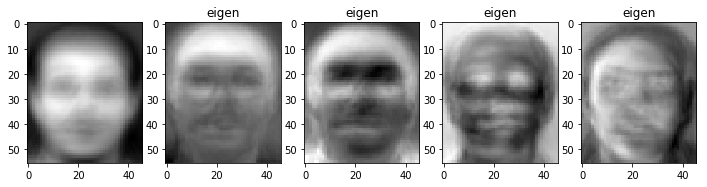

In [50]:
mean_face = np.mean(data, axis=0).reshape(1,56*46)

pca = PCA(n_components = 239)
eigenVectors = pca.fit(data - mean_face.reshape(1,56*46))

#save mean image
mean_img = mean_face.reshape(56,46)
plt.figure(figsize = (12,9))
plt.subplot(1,5,1)
plt.imshow(mean_img,cmap = 'gray')
plt.savefig('./mean.png')

#save eigenface images
for i in range(0,4):
    eigen_img = np.reshape(eigenVectors.components_[i],newshape = (56,46))
    plt.subplot(1,5,i+2)
    plt.title("eigen")
    plt.imshow(eigen_img,cmap = 'gray')
    plt.savefig('./p1_eigenface'+str(i+1)+'.png')


***
##     (2)Plot the four reconstructed images

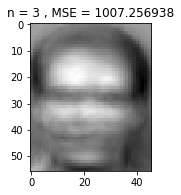

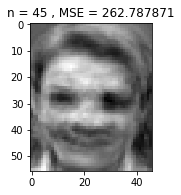

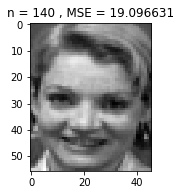

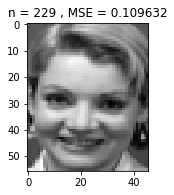

In [51]:
img_1_1 = cv.imread('./p2_data/1_1.png',0)
img_1_1 = img_1_1.reshape(1,56*46)

my_list = [3, 45, 140, 229]
for index in my_list:
    k = 1
    img = mean_img.reshape(1,56*46)
    for i in range(index):
        img += np.inner(img_1_1 - mean_img.reshape(1,56*46),eigenVectors.components_[i])*eigenVectors.components_[i]
    MSE = mean_squared_error(img_1_1,img)
    plt.figure(figsize = (10,8))
    plt.subplot(1,4,k)
    plt.title("n = %d , MSE = %f" %(index,MSE))
    plt.imshow(img.reshape(56,46),cmap = 'gray')
    plt.savefig('./p2_reconstruct'+str(i+1)+'.png')
    k += 1
